In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-02-23 11:05:04.190433: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_3_filtered.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
698  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
699  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
700  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
701  0.078067 -0.018678  307.060001  2491.494117   963.167535   964.349008   
702  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...        lon  \
0    5.750744  5.858569  73.541799  72.235029  ... -124.30400   
1    5.016032  5.128066  77.170098  76.182660  ... -124.30400   
2    4.964464  5.199127  66.090098  63.038793  ... -124.30400   
3    4.241058  4.533348  44.618498  40.755557  ... -124.30400   
4    7.084940  7.120605  91.120398  91.004979  ... -124.30400   
..        ...       ...        ...        ...  ...        ...   
698  2.913308  2.980954  77.774753  76.929502  ...  -39.47378   
699  2.513606  2.630492  80.575903  79.902359  ...  -39.47378   
700  2.848601  2.917305  75.022252  74.087723  ...  -39.47378   
701  5.345668  5.334279  94.738453  94.818847  ...  -39.47378   
702  2.850011  2.943405  81.332702  79.900122  ...  -39.47378   

       datetime_rounded  valid_flag    s0_norm         s0        inc  \
0   2018-04-11 14:00:00        True  -9.363116 -12.031128  32.142909   
1   2018-04-12 14:00:00        True  -7.600479 -16.269062  42.147041   
2   2018-04-23 15:00:00        True -12.324214 -17.961716  32.153723   
3   2018-04-24 14:00:00        True  -7.312592 -15.695445  42.149823   
4   2018-05-05 14:00:00        True -13.471707 -20.250994  32.146365   
..                  ...         ...        ...        ...        ...   
698 2020-01-16 20:00:00        True  -8.194967 -16.214437  40.544463   
699 2020-01-17 09:00:00        True  -7.009644 -13.991391  40.734668   
700 2020-01-17 20:00:00        True  -9.756761 -13.902531  33.539960   
701 2020-01-18 19:00:00        True  -9.070873  -6.321890  25.538845   
702 2020-01-22 09:00:00        True  -6.689947  -7.928595  33.745750   

             az     s0_max     s0_min    s0_std  
0    280.917480  -3.407569 -22.433456  2.521000  
1    279.718475  -8.678307 -26.619694  2.433002  
2    280.917114 -10.039296 -28.274248  2.314702  
3    279.718170  -8.517033 -25.703568  2.351530  
4    280.917114 -12.546751 -32.714973  2.376225  
..          ...        ...        ...       ...  
698  439.777008  -8.904028 -27.784959  2.493297  
699  280.223236  -5.982914 -26.481835  2.340112  
700  438.030548  -5.528799 -23.905290  2.394380  
701  436.036377  -2.204885 -10.600880  1.361061  
702  281.968994  -0.289459 -18.928423  2.359826  

[703 rows x 61 columns]

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0    0.131507  0.306354  344.480002  2476.816541  1005.776480  1006.983499   
1    0.169644  0.076862  301.660002  2477.280367  1011.450370  1012.675998   
2    0.025622 -0.383063  274.325002  2476.904365  1020.987403  1022.212997   
3   -0.202953 -0.490062  309.255003  2476.669098  1013.606853  1014.807996   
4   -0.026441 -0.730744  320.615001  2475.218603  1018.266915  1019.488495   
..        ...       ...         ...          ...          ...          ...   
698  0.078067 -0.018678  257.135000  2491.579194   994.525701   995.769507   
699  0.078067 -0.018678  238.530001  2491.798855   999.285638  1000.545505   
700  0.078067 -0.018678  266.660001  2491.502372  1002.762277  1004.015002   
701  0.078067 -0.018678  307.060001  2491.494117   963.167535   964.349008   
702  0.078067 -0.018678  267.574999  2491.964731   999.145041  1000.397998   

          Q10      Qair         RH       RH10  ...        lon  \
0    5.750744  5.858569  73.541799  72.235029  ... -124.30400   
1    5.016032  5.128066  77.170098  76.182660  ... -124.30400   
2    4.964464  5.199127  66.090098  63.038793  ... -124.30400   
3    4.241058  4.533348  44.618498  40.755557  ... -124.30400   
4    7.084940  7.120605  91.120398  91.004979  ... -124.30400   
..        ...       ...        ...        ...  ...        ...   
698  2.913308  2.980954  77.774753  76.929502  ...  -39.47378   
699  2.513606  2.630492  80.575903  79.902359  ...  -39.47378   
700  2.848601  2.917305  75.022252  74.087723  ...  -39.47378   
701  5.345668  5.334279  94.738453  94.818847  ...  -39.47378   
702  2.850011  2.943405  81.332702  79.900122  ...  -39.47378   

       datetime_rounded  valid_flag    s0_norm         s0        inc  \
0   2018-04-11 14:00:00        True  -9.363116 -12.031128  32.142909   
1   2018-04-12 14:00:00        True  -7.600479 -16.269062  42.147041   
2   2018-04-23 15:00:00        True -12.324214 -17.961716  32.153723   
3   2018-04-24 14:00:00        True  -7.312592 -15.695445  42.149823   
4   2018-05-05 14:00:00        True -13.471707 -20.250994  32.146365   
..                  ...         ...        ...        ...        ...   
698 2020-01-16 20:00:00        True  -8.194967 -16.214437  40.544463   
699 2020-01-17 09:00:00        True  -7.009644 -13.991391  40.734668   
700 2020-01-17 20:00:00        True  -9.756761 -13.902531  33.539960   
701 2020-01-18 19:00:00        True  -9.070873  -6.321890  25.538845   
702 2020-01-22 09:00:00        True  -6.689947  -7.928595  33.745750   

             az     s0_max     s0_min    s0_std  
0    280.917480  -3.407569 -22.433456  2.521000  
1    279.718475  -8.678307 -26.619694  2.433002  
2    280.917114 -10.039296 -28.274248  2.314702  
3    279.718170  -8.517033 -25.703568  2.351530  
4    280.917114 -12.546751 -32.714973  2.376225  
..          ...        ...        ...       ...  
698  439.777008  -8.904028 -27.784959  2.493297  
699  280.223236  -5.982914 -26.481835  2.340112  
700  438.030548  -5.528799 -23.905290  2.394380  
701  436.036377  -2.204885 -10.600880  1.361061  
702  281.968994  -0.289459 -18.928423  2.359826  

[703 rows x 61 columns]

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
550 -0.012150 -0.032903  351.980002  2478.168359  1019.863824  1021.104507   
231  0.009946 -0.040725  263.339998  2485.612715   999.062122  1000.282507   
620  0.078067 -0.018678  318.400003  2481.631474  1010.865820  1012.091492   
363 -0.012150 -0.032903  263.644999  2487.925266   991.189028   992.409497   
93  -0.077909 -0.053197  270.725000  2482.669306  1029.655956  1030.922998   
..        ...       ...         ...          ...          ...          ...   
664  0.078067 -0.018678  332.850000  2488.098458  1012.717105  1013.958994   
293  0.175666  0.145623  333.020001  2473.552807   999.034421  1000.243503   
235  0.009946 -0.040725  341.869998  2482.506354  1008.696743  1009.924493   
596  0.047276 -0.131407  270.000000  2477.369433   994.023265   995.224493   
607  0.078067 -0.018678  277.374998  2478.306940  1006.743041  1007.961996   

          Q10      Qair         RH       RH10  ...        lon  \
550  6.098199  6.111122  98.692553  98.937198  ...  -39.47378   
231  4.999318  5.039016  85.287400  84.874004  ...  -39.47378   
620  6.148969  6.166682  92.716153  92.665646  ...  -39.47378   
363  4.218824  4.268435  82.945053  82.477130  ...  -39.47378   
93   3.728190  3.823568  78.290597  77.379643  ...  -70.77850   
..        ...       ...        ...        ...  ...        ...   
664  5.210573  5.216395  96.652503  96.841041  ...  -39.47378   
293  5.345781  5.480392  79.874400  78.938486  ... -124.30400   
235  5.848126  5.867202  94.438099  94.516914  ...  -39.47378   
596  5.760281  5.831873  80.624402  80.005245  ...  -39.47378   
607  5.555288  5.622438  81.474403  80.900467  ...  -39.47378   

       datetime_rounded  valid_flag    s0_norm         s0        inc  \
550 2021-07-27 09:00:00        True -13.810944 -22.179092  33.756705   
231 2017-06-20 20:00:00        True  -8.873229  -5.928538  25.541340   
620 2019-09-30 20:00:00        True  -8.518636 -16.856476  40.537636   
363 2020-11-12 09:00:00        True  -8.964825 -17.900355  40.732867   
93  2018-02-07 11:00:00        True  -9.432480 -15.894545  36.942763   
..                  ...         ...        ...        ...        ...   
664 2019-11-30 09:00:00        True -10.531108 -21.023922  40.721270   
293 2016-12-23 14:00:00        True -10.130495 -13.566919  32.144239   
235 2017-07-28 12:00:00        True -11.245704 -22.318418  40.547695   
596 2019-08-25 20:00:00        True  -8.544512 -16.914012  40.545089   
607 2019-09-12 20:00:00        True  -6.007861 -11.830559  40.532007   

             az     s0_max     s0_min    s0_std  
550  281.998871 -14.403354 -33.655790  2.234584  
231  436.039642  -2.696856  -9.671642  1.207927  
620  440.176697 -13.292068 -21.013736  1.308152  
363  280.222595 -10.593684 -31.048363  2.300221  
93   280.304932  -9.493719 -26.184980  2.188200  
..          ...        ...        ...       ...  
664  280.226105 -14.442977 -31.748220  2.168826  
293  280.918274  -4.520779 -25.375633  2.606002  
235  439.782623 -18.973738 -26.070083  1.300691  
596  440.178009 -12.037181 -21.105565  1.491682  
607  439.778198  -8.173307 -16.641775  1.431858  

[703 rows x 61 columns]

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

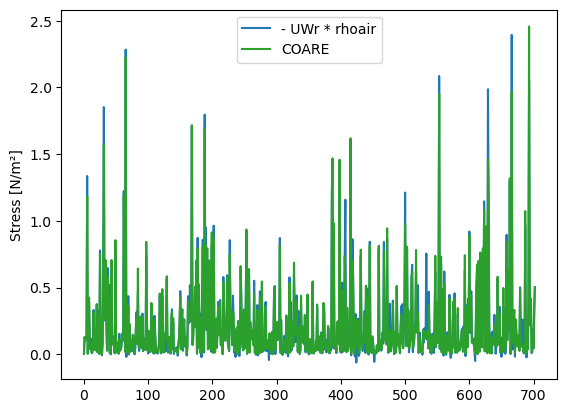

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [10]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [11]:
700*0.8

560.0

In [12]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

In [13]:
predictor_variables = ['s0', 'inc', 'az']

In [14]:
x = df[predictor_variables]
x

s0        inc          az
550 -22.179092  33.756705  281.998871
231  -5.928538  25.541340  436.039642
620 -16.856476  40.537636  440.176697
363 -17.900355  40.732867  280.222595
93  -15.894545  36.942763  280.304932
..         ...        ...         ...
664 -21.023922  40.721270  280.226105
293 -13.566919  32.144239  280.918274
235 -22.318418  40.547695  439.782623
596 -16.914012  40.545089  440.178009
607 -11.830559  40.532007  439.778198

[703 rows x 3 columns]

In [15]:
y = - df['UWr'] * df['rhoair']
y

550    0.004852
231    0.128829
620    0.113729
363    0.116743
93     0.114107
         ...   
664    0.030718
293    0.186508
235    0.044480
596    0.299941
607    0.501150
Length: 703, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [16]:
c = df['stress']

In [17]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [18]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [19]:
c_train = c[:split_idx]
c_test = c[split_idx:]

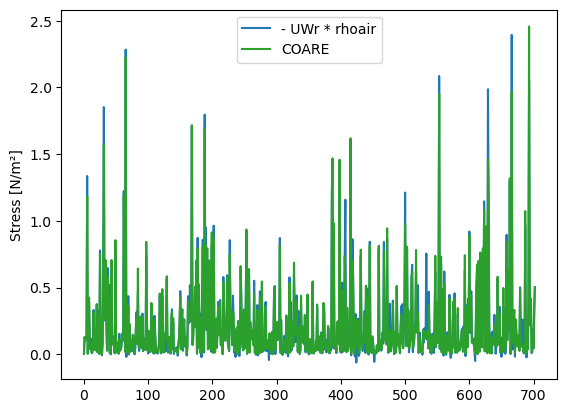

In [20]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [21]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [23]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [24]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-02-23 10:57:22.488488: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-23 10:57:22.489325: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 10:57:22.489336: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 10:57:22.489359: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-bm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-02-23 10:57:22.489591: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
13/13 [==============================] - 1s 62ms/step - loss: 29872.8380 - mean_absolute_error: 167.6713 - val_loss: 27051.0566 - val_mean_absolute_error: 158.9400
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 26520.0950 - mean_absolute_error: 157.4488 - val_loss: 25310.8418 - val_mean_absolute_error: 153.6230
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 25559.0343 - mean_absolute_error: 154.6701 - val_loss: 23637.3281 - val_mean_absolute_error: 148.3333
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 23679.6500 - mean_absolute_error: 148.7490 - val_loss: 22050.9180 - val_mean_absolute_error: 143.1410
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 22030.2207 - mean_absolute_error: 143.2862 - val_loss: 20541.1680 - val_mean_absolute_error: 138.0215
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 21299.3557 - mean_absolute_error: 141.0529 - val_lo

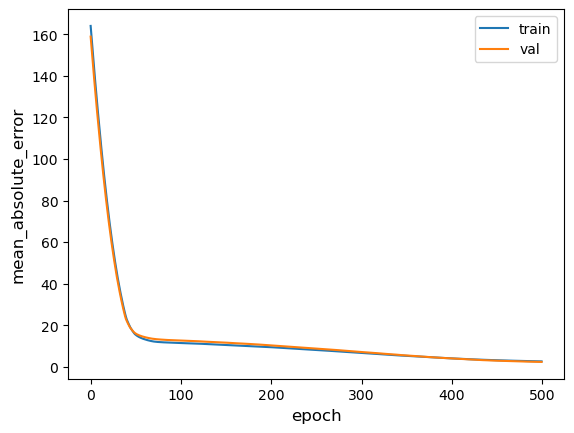

5/5 [==============================] - 0s 658us/step - loss: 11.0828 - mean_absolute_error: 2.5079
Test accuracy 2.507890224456787
Test loss 11.0828218460083


In [25]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [26]:
y_test_pred = multi_dense_model.predict(x_test)

In [27]:
np.mean(y_test)

0.24806902836947753

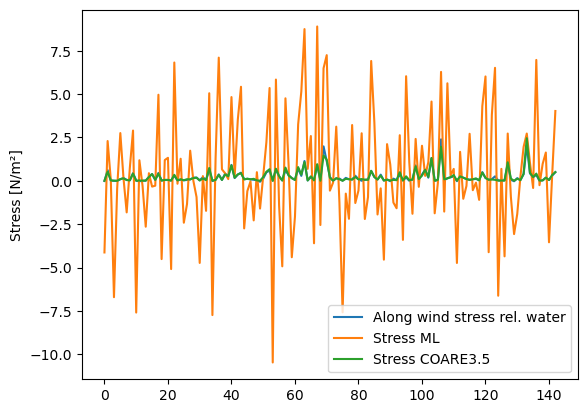

In [28]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [29]:
rmse(y_test.values, y_test_pred)

3.5487999649439006

In [30]:
rmse(y_test.values, c_test)

0.07877586678751598

# Other experiments

In [22]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [23]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [24]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-02-23 11:05:43.396249: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-23 11:05:43.396523: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 11:05:43.396531: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 11:05:43.396548: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-bm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-02-23 11:05:43.396710: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
13/13 [==============================] - 1s 47ms/step - loss: 0.3843 - mean_absolute_error: 0.5272 - val_loss: 14.4018 - val_mean_absolute_error: 3.5526
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2964 - mean_absolute_error: 0.4740 - val_loss: 3.3589 - val_mean_absolute_error: 1.6256
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2081 - mean_absolute_error: 0.3894 - val_loss: 0.8693 - val_mean_absolute_error: 0.7653
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1936 - mean_absolute_error: 0.3548 - val_loss: 0.2610 - val_mean_absolute_error: 0.4138
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1687 - mean_absolute_error: 0.3109 - val_loss: 0.1778 - val_mean_absolute_error: 0.3263
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1305 - mean_absolute_error: 0.2628 - val_loss: 0.2559 - val_mean_absolute_error: 0.3870
Epoch 7/500
13/13 [=

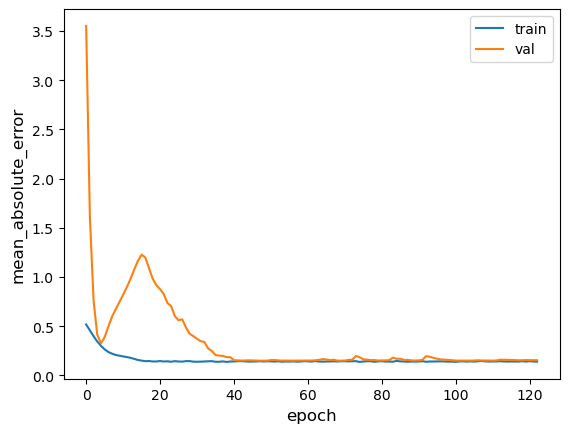

5/5 [==============================] - 0s 605us/step - loss: 0.0875 - mean_absolute_error: 0.1544
Test accuracy 0.15437495708465576
Test loss 0.08746245503425598


In [25]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [26]:
y_test_pred = multi_dense_model.predict(x_test)

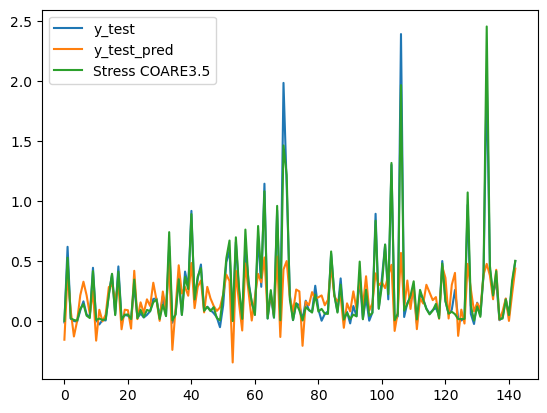

In [27]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [28]:
rmse(y_test.values, y_test_pred)

0.42176985395662064

## Correlation

In [29]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67688841],
       [0.67688841, 1.        ]])

In [30]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

In [31]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [32]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [33]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6290 - mean_absolute_error: 0.6568 - val_loss: 84.1129 - val_mean_absolute_error: 9.0848
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5664 - mean_absolute_error: 0.6205 - val_loss: 29.8896 - val_mean_absolute_error: 5.3949
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5224 - mean_absolute_error: 0.5991 - val_loss: 14.0626 - val_mean_absolute_error: 3.6802
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5584 - mean_absolute_error: 0.6020 - val_loss: 7.4892 - val_mean_absolute_error: 2.6644
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4796 - mean_absolute_error: 0.5510 - val_loss: 4.3052 - val_mean_absolute_error: 1.9992
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4450 - mean_absolute_error: 0.5393 - val_loss: 2.5660 - val_mean_absolute_error: 1.5238
Epoch 7/500
13/13 [

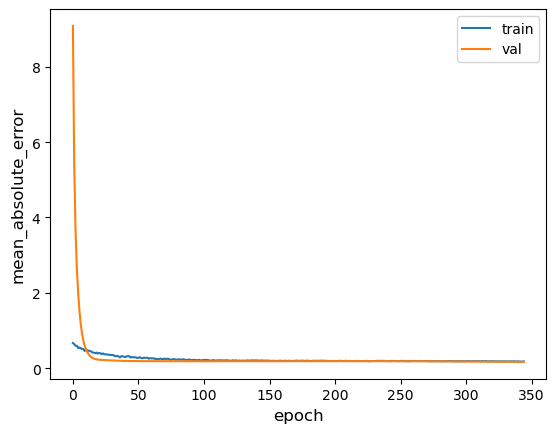

5/5 [==============================] - 0s 565us/step - loss: 0.1420 - mean_absolute_error: 0.1933
Test accuracy 0.1933111697435379
Test loss 0.14197838306427002


In [34]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [35]:
y_test_pred = multi_dense_model.predict(x_test)

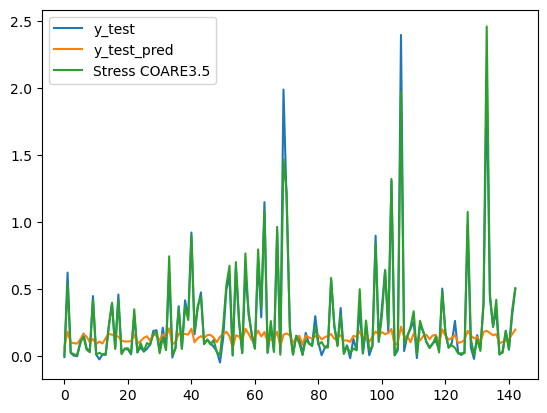

In [36]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [37]:
rmse(y_test.values, y_test_pred)

0.3964323498825908

## Correlation

In [38]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.62954765],
       [0.62954765, 1.        ]])

In [39]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

In [40]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [41]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [42]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 2.4243 - mean_absolute_error: 1.4601 - val_loss: 285.1483 - val_mean_absolute_error: 16.3279
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3015 - mean_absolute_error: 1.4090 - val_loss: 105.6466 - val_mean_absolute_error: 9.8377
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0428 - mean_absolute_error: 1.3152 - val_loss: 53.8866 - val_mean_absolute_error: 6.9337
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9917 - mean_absolute_error: 1.3186 - val_loss: 31.5995 - val_mean_absolute_error: 5.2237
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7970 - mean_absolute_error: 1.2473 - val_loss: 19.4911 - val_mean_absolute_error: 4.0154
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6923 - mean_absolute_error: 1.2200 - val_loss: 12.5339 - val_mean_absolute_error: 3.1300
Epoch 7/500
1

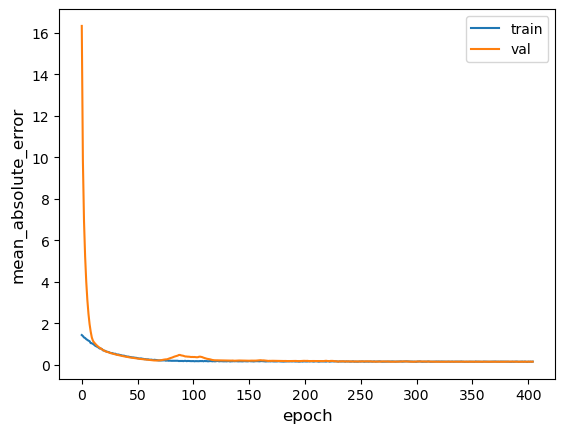

5/5 [==============================] - 0s 638us/step - loss: 0.0869 - mean_absolute_error: 0.1557
Test accuracy 0.15572121739387512
Test loss 0.08685655891895294


In [43]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [44]:
y_test_pred = multi_dense_model.predict(x_test)

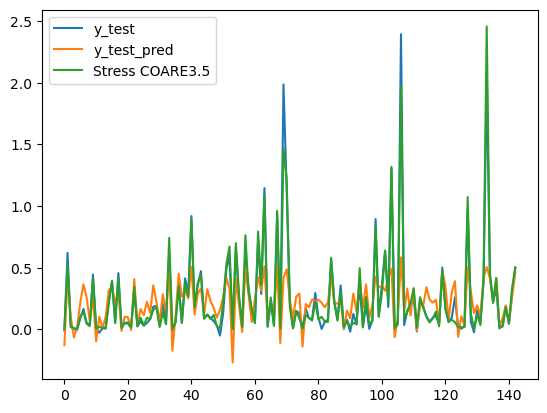

In [45]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [46]:
rmse(y_test.values, y_test_pred)

0.4149529672632897

## Correlation

In [47]:
y_test_pred.shape

(143, 1)

In [48]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67832478],
       [0.67832478, 1.        ]])

In [49]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

### Best model!!!

In [70]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [71]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [72]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 11ms/step - loss: 2.1078 - mean_absolute_error: 1.2364 - val_loss: 7.1568 - val_mean_absolute_error: 2.4139
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6194 - mean_absolute_error: 1.0165 - val_loss: 4.8244 - val_mean_absolute_error: 2.0445
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3949 - mean_absolute_error: 0.9002 - val_loss: 4.8536 - val_mean_absolute_error: 2.0767
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0678 - mean_absolute_error: 0.7699 - val_loss: 4.4418 - val_mean_absolute_error: 1.9359
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.8395 - mean_absolute_error: 0.6718 - val_loss: 2.7324 - val_mean_absolute_error: 1.4253
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6569 - mean_absolute_error: 0.6034 - val_loss: 1.6678 - val_mean_absolute_error: 1.0027
Epoch 7/500
13/13 [==

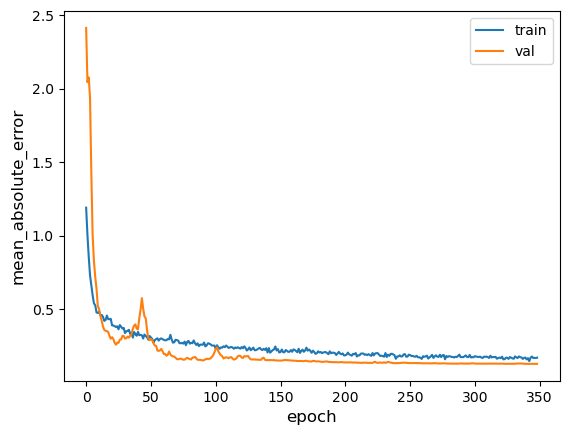

5/5 [==============================] - 0s 575us/step - loss: 0.0670 - mean_absolute_error: 0.1307
Test accuracy 0.1307147890329361
Test loss 0.0669904574751854


In [73]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [74]:
y_test_pred = multi_dense_model.predict(x_test)

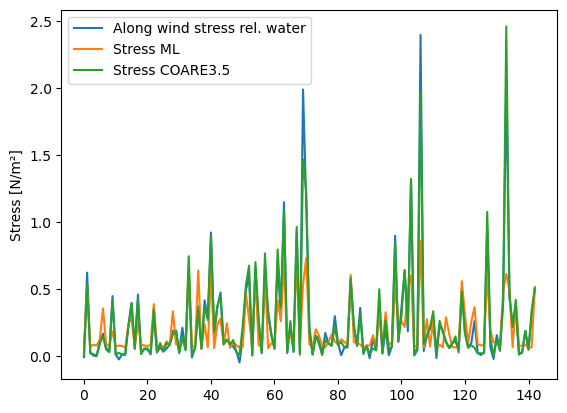

In [75]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [76]:
rmse(y_test.values, y_test_pred)

0.4282753361916368

In [77]:
rmse(y_test.values, c_test.values)

0.07877586678751598

In [78]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79572338],
       [0.79572338, 1.        ]])

In [79]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

In [60]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [61]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [62]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 112ms/step - loss: 1.8339 - mean_absolute_error: 1.0813 - val_loss: 767.5886 - val_mean_absolute_error: 27.2187
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 1.6603 - mean_absolute_error: 1.0176 - val_loss: 376.1206 - val_mean_absolute_error: 19.0310
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 1.1228 - mean_absolute_error: 0.8335 - val_loss: 245.2654 - val_mean_absolute_error: 15.3557
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.8505 - mean_absolute_error: 0.7080 - val_loss: 187.8132 - val_mean_absolute_error: 13.4286
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.8861 - mean_absolute_error: 0.7415 - val_loss: 156.3788 - val_mean_absolute_error: 12.2435
Epoch 6/500
2/2 [==============================] - 0s 24ms/step - loss: 0.8493 - mean_absolute_error: 0.7246 - val_loss: 137.1542 - val_mean_absolute_error: 11.4577
Epoch 7/5

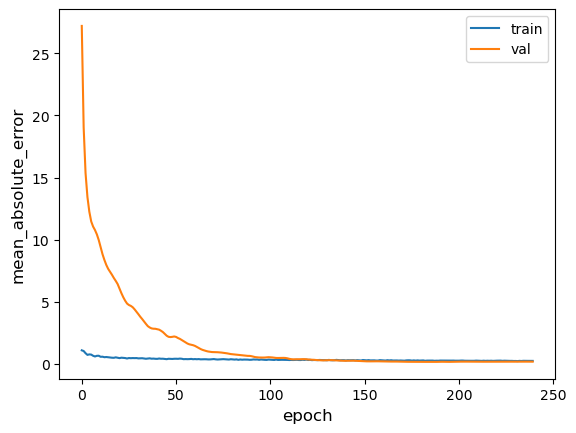

5/5 [==============================] - 0s 678us/step - loss: 0.0986 - mean_absolute_error: 0.1617
Test accuracy 0.16166724264621735
Test loss 0.09859098494052887


In [63]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [64]:
y_test_pred = multi_dense_model.predict(x_test)

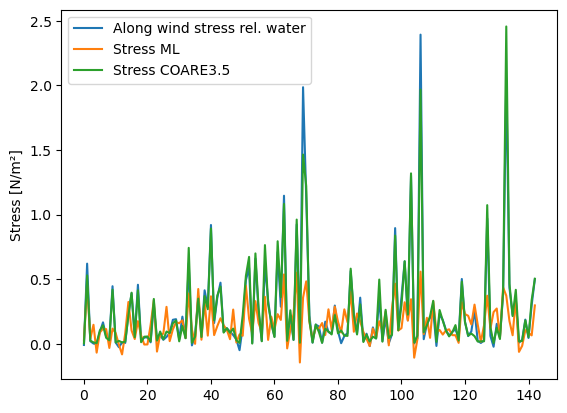

In [65]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [66]:
rmse(y_test.values, y_test_pred)

0.41542208257168584

In [67]:
rmse(y_test.values, c_test.values)

0.07877586678751598

In [68]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.68579592],
       [0.68579592, 1.        ]])

In [69]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

#### Very unstable - get different results every time I run it

In [80]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [81]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [82]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 130ms/step - loss: 1.9752 - mean_absolute_error: 1.1169 - val_loss: 123.2463 - val_mean_absolute_error: 10.7448
Epoch 2/500
2/2 [==============================] - 0s 25ms/step - loss: 1.2776 - mean_absolute_error: 0.8860 - val_loss: 37.0239 - val_mean_absolute_error: 5.8529
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 0.9106 - mean_absolute_error: 0.7698 - val_loss: 36.4600 - val_mean_absolute_error: 5.8192
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 0.7288 - mean_absolute_error: 0.6808 - val_loss: 56.8553 - val_mean_absolute_error: 7.3068
Epoch 5/500
2/2 [==============================] - 0s 23ms/step - loss: 0.5526 - mean_absolute_error: 0.5852 - val_loss: 71.0287 - val_mean_absolute_error: 8.1835
Epoch 6/500
2/2 [==============================] - 0s 24ms/step - loss: 0.4647 - mean_absolute_error: 0.5377 - val_loss: 66.2632 - val_mean_absolute_error: 7.8935
Epoch 7/500
2/2 [==

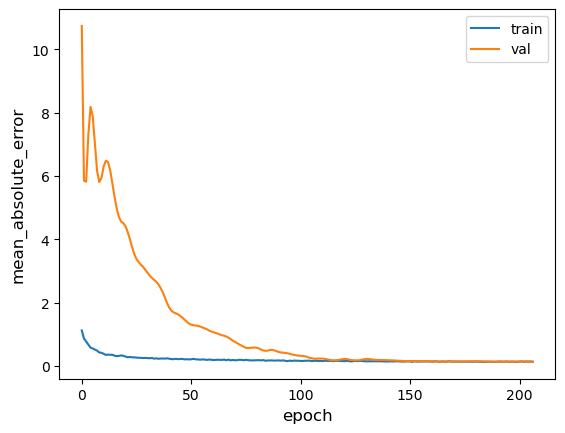

5/5 [==============================] - 0s 818us/step - loss: 0.0785 - mean_absolute_error: 0.1307
Test accuracy 0.13068661093711853
Test loss 0.07851249724626541


In [83]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [84]:
y_test_pred = multi_dense_model.predict(x_test)

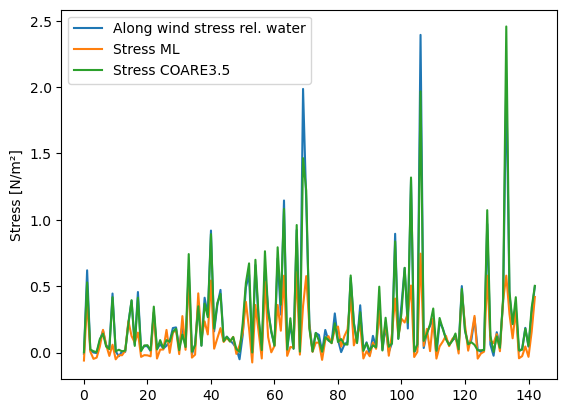

In [85]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [86]:
rmse(y_test.values, y_test_pred)

0.4318224850451764

In [87]:
rmse(y_test.values, c_test.values)

0.07877586678751598

In [88]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81317995],
       [0.81317995, 1.        ]])

In [89]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

# __________________________________________________

# Using only s0_norm

In [675]:
predictor_variables = ['s0_norm']

In [676]:
x = df[predictor_variables]
x

s0_norm
220  -8.473507
169  -8.274988
467  -7.194283
151  -7.900857
695  -5.525506
..         ...
664  -8.598221
293  -9.489844
235 -10.061389
596  -9.238397
607  -9.680034

[704 rows x 1 columns]

In [677]:
y = -  df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [678]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [679]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [680]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [681]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [682]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 17.8765 - mean_absolute_error: 4.1612 - val_loss: 17.5026 - val_mean_absolute_error: 4.1249
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 16.0695 - mean_absolute_error: 3.9538 - val_loss: 16.3664 - val_mean_absolute_error: 3.9889
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 15.1633 - mean_absolute_error: 3.8433 - val_loss: 15.2721 - val_mean_absolute_error: 3.8534
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 14.5256 - mean_absolute_error: 3.7542 - val_loss: 14.2343 - val_mean_absolute_error: 3.7203
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 13.4268 - mean_absolute_error: 3.6057 - val_loss: 13.2589 - val_mean_absolute_error: 3.5906
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 12.2084 - mean_absolute_error: 3.4513 - val_loss: 12.3369 - val_mean_absolute_error: 3.4635
Epoch 7/5

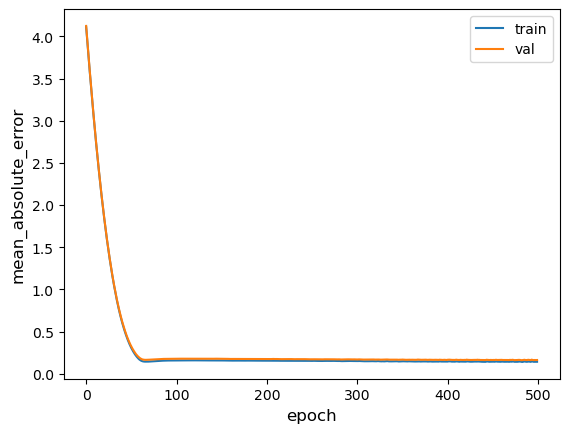

5/5 [==============================] - 0s 601us/step - loss: 0.0626 - mean_absolute_error: 0.1522
Test accuracy 0.15224948525428772
Test loss 0.06257721781730652


In [683]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [684]:
y_test_pred = multi_dense_model.predict(x_test)

In [685]:
np.mean(y_test)

0.21862490743242802

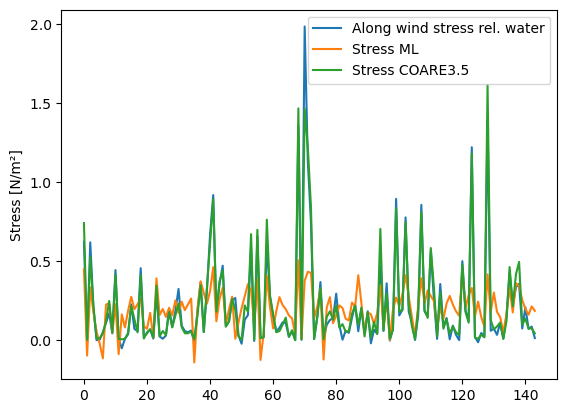

In [686]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [687]:
rmse(y_test.values, y_test_pred)

0.33486161718283164

In [688]:
rmse(y_test.values, c_test)

0.06549902869322344

In [689]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910322],
       [0.63910322, 1.        ]])

In [690]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# Other experiments

In [691]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [692]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [693]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 2.1714 - mean_absolute_error: 1.1160 - val_loss: 2.1384 - val_mean_absolute_error: 1.3607
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0263 - mean_absolute_error: 1.0758 - val_loss: 1.6354 - val_mean_absolute_error: 1.1732
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7453 - mean_absolute_error: 1.0197 - val_loss: 1.1093 - val_mean_absolute_error: 0.9523
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6076 - mean_absolute_error: 0.9370 - val_loss: 0.6646 - val_mean_absolute_error: 0.7189
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4302 - mean_absolute_error: 0.9056 - val_loss: 0.3771 - val_mean_absolute_error: 0.5136
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2492 - mean_absolute_error: 0.8446 - val_loss: 0.2509 - val_mean_absolute_error: 0.3696
Epoch 7/500
13/13 [===

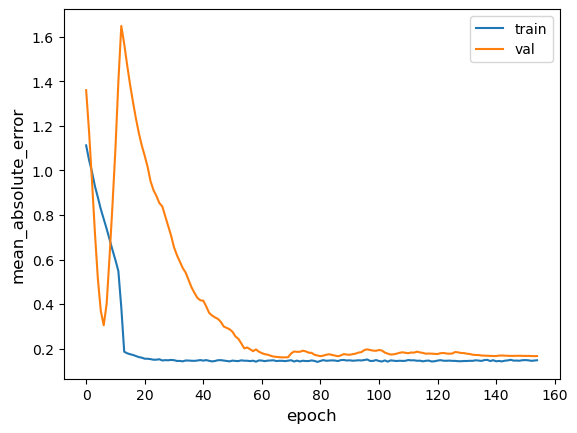

5/5 [==============================] - 0s 700us/step - loss: 0.0579 - mean_absolute_error: 0.1566
Test accuracy 0.15659116208553314
Test loss 0.057945482432842255


In [694]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [695]:
y_test_pred = multi_dense_model.predict(x_test)

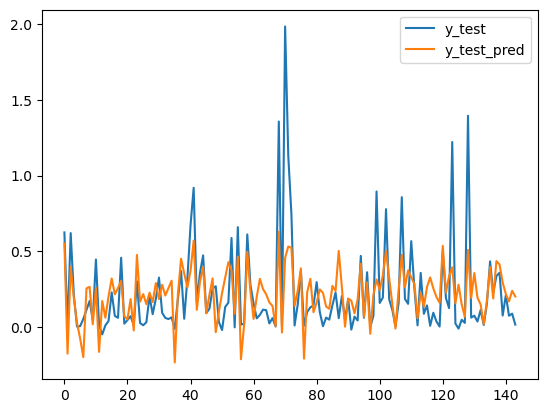

In [696]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [697]:
rmse(y_test.values, y_test_pred)

0.3523857955765627

In [700]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910339],
       [0.63910339, 1.        ]])

In [701]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [702]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [703]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [704]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 18ms/step - loss: 1.8807 - mean_absolute_error: 1.0030 - val_loss: 34.4377 - val_mean_absolute_error: 5.7468
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.7181 - mean_absolute_error: 0.6208 - val_loss: 20.7727 - val_mean_absolute_error: 4.4387
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6062 - mean_absolute_error: 0.5350 - val_loss: 13.1807 - val_mean_absolute_error: 3.5103
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5151 - mean_absolute_error: 0.5249 - val_loss: 8.6186 - val_mean_absolute_error: 2.8118
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5653 - mean_absolute_error: 0.5211 - val_loss: 5.8074 - val_mean_absolute_error: 2.2796
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5356 - mean_absolute_error: 0.5124 - val_loss: 3.9819 - val_mean_absolute_error: 1.8571
Epoch 7/500
13/13 

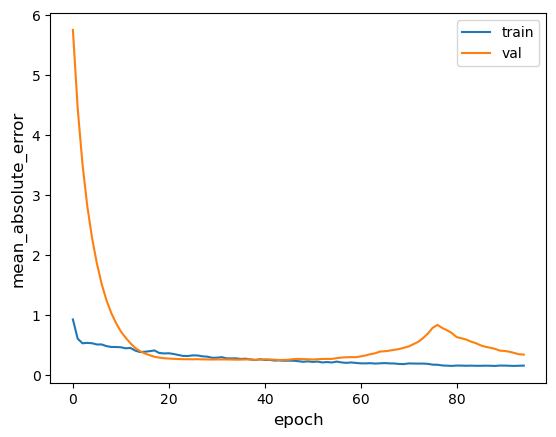

5/5 [==============================] - 0s 664us/step - loss: 0.1395 - mean_absolute_error: 0.3345
Test accuracy 0.334537148475647
Test loss 0.13945549726486206


In [705]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [706]:
y_test_pred = multi_dense_model.predict(x_test)

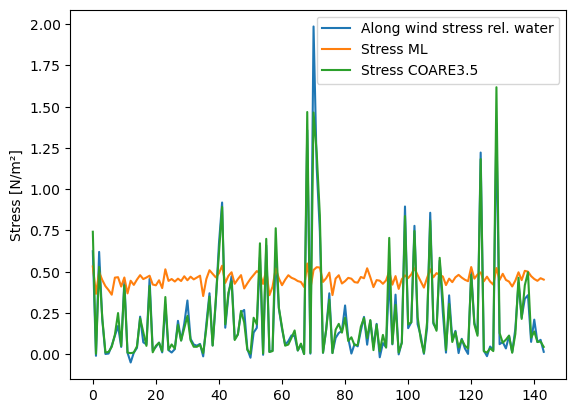

In [707]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [708]:
rmse(y_test.values, y_test_pred)

0.3931228504993975

In [709]:
rmse(c_test.values, y_test.values)

0.06549902869322344

In [710]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910329],
       [0.63910329, 1.        ]])

In [711]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [712]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [713]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [714]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.9126 - mean_absolute_error: 0.7003 - val_loss: 36.4313 - val_mean_absolute_error: 5.9089
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4303 - mean_absolute_error: 0.4662 - val_loss: 20.6648 - val_mean_absolute_error: 4.4263
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4519 - mean_absolute_error: 0.4991 - val_loss: 11.1116 - val_mean_absolute_error: 3.2220
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5184 - mean_absolute_error: 0.4592 - val_loss: 6.0600 - val_mean_absolute_error: 2.3545
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4137 - mean_absolute_error: 0.4214 - val_loss: 3.3434 - val_mean_absolute_error: 1.7222
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2901 - mean_absolute_error: 0.3830 - val_loss: 1.7234 - val_mean_absolute_error: 1.2044
Epoch 7/500
13/13 [

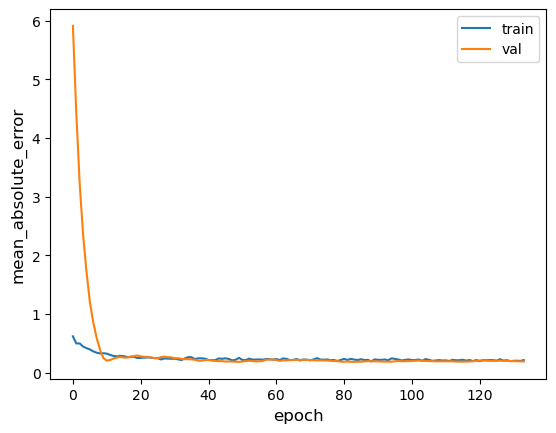

5/5 [==============================] - 0s 739us/step - loss: 0.0629 - mean_absolute_error: 0.1823
Test accuracy 0.18232101202011108
Test loss 0.06292898952960968


In [715]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [716]:
y_test_pred = multi_dense_model.predict(x_test)

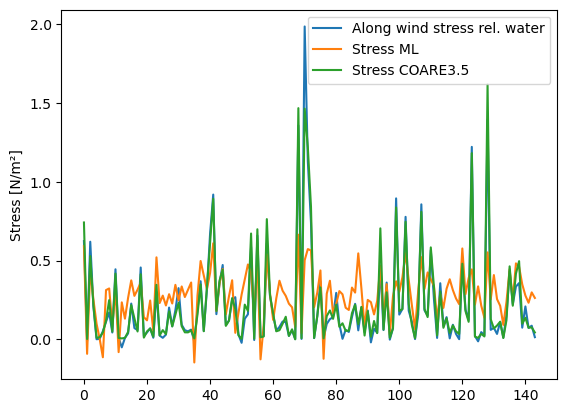

In [717]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [718]:
rmse(y_test.values, y_test_pred)

0.3536595734309756

In [719]:
rmse(c_test.values, y_test.values)

0.06549902869322344

In [720]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910324],
       [0.63910324, 1.        ]])

In [721]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [722]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [723]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [724]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 3.2904 - mean_absolute_error: 1.3151 - val_loss: 32.4980 - val_mean_absolute_error: 5.4259
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 2.8376 - mean_absolute_error: 1.2949 - val_loss: 16.7363 - val_mean_absolute_error: 3.7808
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 2.4446 - mean_absolute_error: 1.2038 - val_loss: 8.5867 - val_mean_absolute_error: 2.6030
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 2.5255 - mean_absolute_error: 1.1607 - val_loss: 4.6564 - val_mean_absolute_error: 1.8354
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 2.0094 - mean_absolute_error: 1.0864 - val_loss: 2.7286 - val_mean_absolute_error: 1.3502
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9561 - mean_absolute_error: 1.0226 - val_loss: 1.7244 - val_mean_absolute_error: 1.0314
Epoch 7/500
25/25 [=

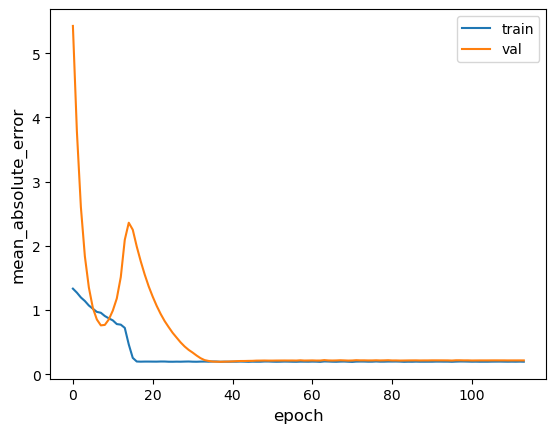

5/5 [==============================] - 0s 620us/step - loss: 0.0964 - mean_absolute_error: 0.2022
Test accuracy 0.2022252082824707
Test loss 0.096407450735569


In [725]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [726]:
y_test_pred = multi_dense_model.predict(x_test)

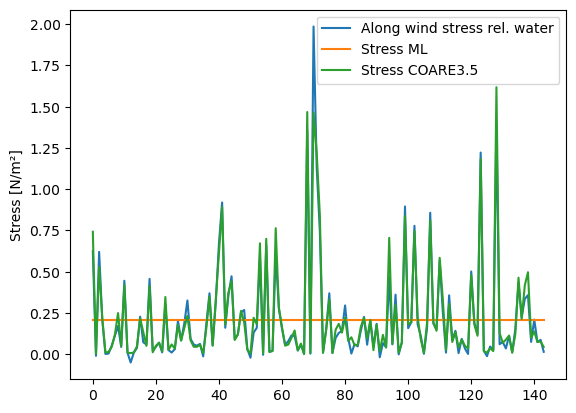

In [727]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [728]:
rmse(y_test.values, y_test_pred)

0.31049549546379845

In [729]:
rmse(y_test.values, c_test)

0.06549902869322344

In [730]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1., nan],
       [nan, nan]])

In [731]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [732]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [733]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [734]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1606 - mean_absolute_error: 0.2343 - val_loss: 1.1879 - val_mean_absolute_error: 1.0052
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1153 - mean_absolute_error: 0.1897 - val_loss: 0.7632 - val_mean_absolute_error: 0.7979
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1047 - mean_absolute_error: 0.1883 - val_loss: 0.5115 - val_mean_absolute_error: 0.6441
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0949 - mean_absolute_error: 0.1737 - val_loss: 0.3832 - val_mean_absolute_error: 0.5482
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1098 - mean_absolute_error: 0.1951 - val_loss: 0.3415 - val_mean_absolute_error: 0.5116
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0816 - mean_absolute_error: 0.1808 - val_loss: 0.3074 - val_mean_absolute_error: 0.4786
Epoch 7/500
13/13 [===

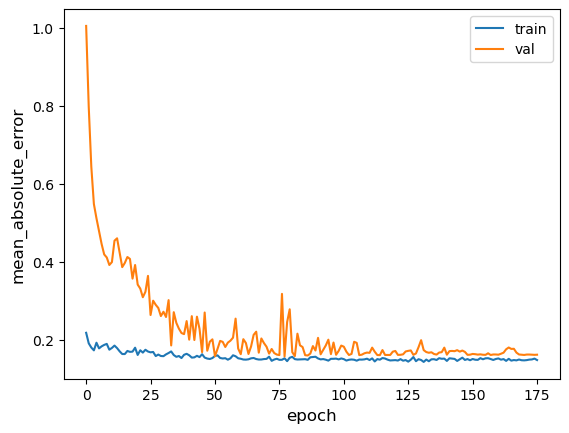

5/5 [==============================] - 0s 615us/step - loss: 0.0584 - mean_absolute_error: 0.1509
Test accuracy 0.15091069042682648
Test loss 0.058389052748680115


In [735]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [736]:
y_test_pred = multi_dense_model.predict(x_test)

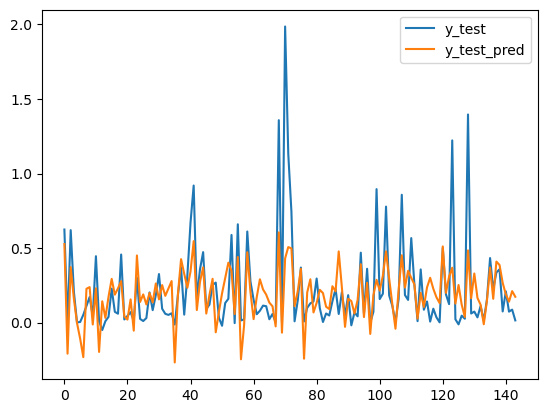

In [737]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [738]:
rmse(y_test.values, y_test_pred)

0.3539130768740982

In [739]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910323],
       [0.63910323, 1.        ]])

In [740]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [741]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [742]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [743]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 12ms/step - loss: 0.5006 - mean_absolute_error: 0.5446 - val_loss: 0.6719 - val_mean_absolute_error: 0.7478
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5623 - mean_absolute_error: 0.5530 - val_loss: 0.5181 - val_mean_absolute_error: 0.6448
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5021 - mean_absolute_error: 0.5003 - val_loss: 0.3997 - val_mean_absolute_error: 0.5518
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3391 - mean_absolute_error: 0.4390 - val_loss: 0.3171 - val_mean_absolute_error: 0.4738
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3693 - mean_absolute_error: 0.4338 - val_loss: 0.2639 - val_mean_absolute_error: 0.4136
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4523 - mean_absolute_error: 0.4201 - val_loss: 0.2260 - val_mean_absolute_error: 0.3630
Epoch 7/500
13/13 [==

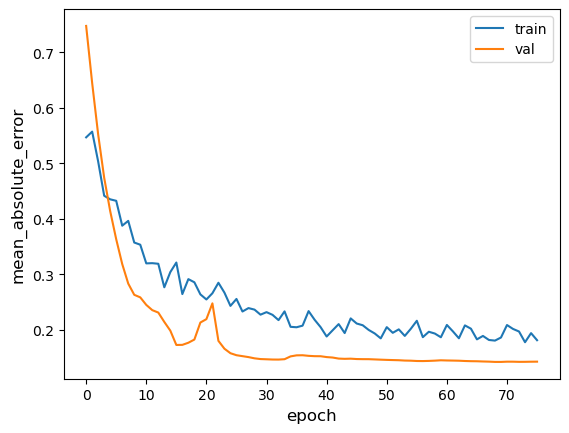

5/5 [==============================] - 0s 612us/step - loss: 0.0468 - mean_absolute_error: 0.1308
Test accuracy 0.1307665854692459
Test loss 0.046771369874477386


In [744]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [745]:
y_test_pred = multi_dense_model.predict(x_test)

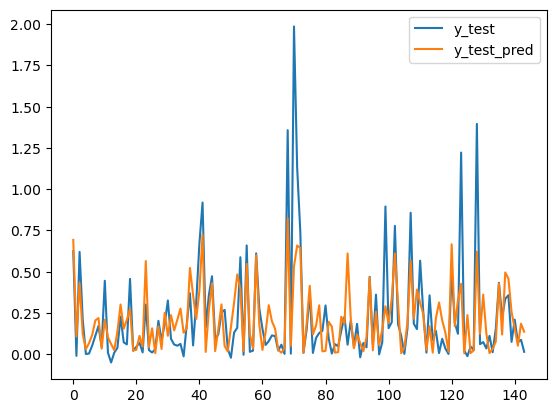

In [746]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [747]:
rmse(y_test.values, y_test_pred)

0.363172907297227

In [748]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72725113],
       [0.72725113, 1.        ]])

In [749]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [750]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [751]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [752]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 0.5296 - mean_absolute_error: 0.5606 - val_loss: 0.1656 - val_mean_absolute_error: 0.2230
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4652 - mean_absolute_error: 0.5294 - val_loss: 0.1665 - val_mean_absolute_error: 0.2244
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2997 - mean_absolute_error: 0.4407 - val_loss: 0.1601 - val_mean_absolute_error: 0.2220
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2470 - mean_absolute_error: 0.3921 - val_loss: 0.1532 - val_mean_absolute_error: 0.2198
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2091 - mean_absolute_error: 0.3465 - val_loss: 0.1298 - val_mean_absolute_error: 0.2024
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1704 - mean_absolute_error: 0.3175 - val_loss: 0.1060 - val_mean_absolute_error: 0.1748
Epoch 7/500
25/25 [===

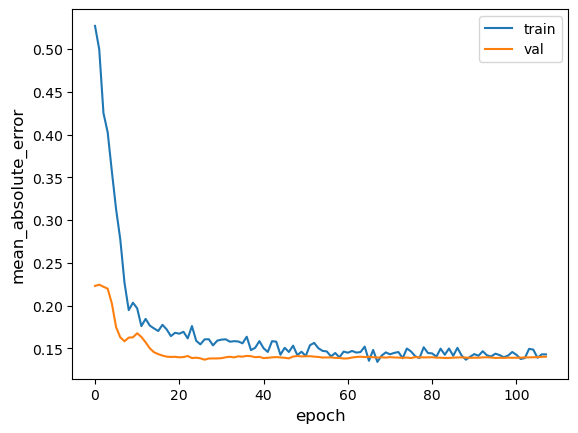

5/5 [==============================] - 0s 656us/step - loss: 0.0511 - mean_absolute_error: 0.1317
Test accuracy 0.13168446719646454
Test loss 0.051127608865499496


In [753]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [754]:
y_test_pred = multi_dense_model.predict(x_test)

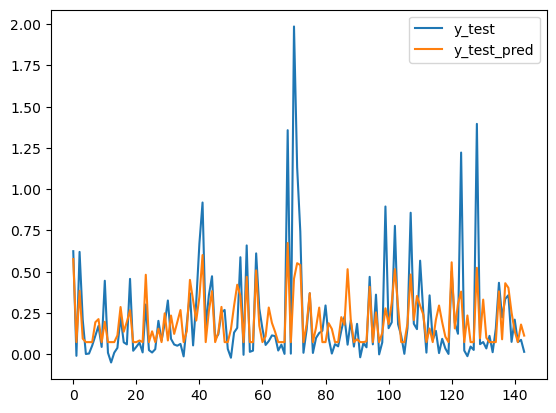

In [755]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [756]:
rmse(y_test.values, y_test_pred)

0.34465883365726563

In [757]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73087353],
       [0.73087353, 1.        ]])

In [758]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [759]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [760]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [761]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 0.6074 - mean_absolute_error: 0.6011 - val_loss: 0.1327 - val_mean_absolute_error: 0.1927
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5499 - mean_absolute_error: 0.5736 - val_loss: 0.1183 - val_mean_absolute_error: 0.2145
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4781 - mean_absolute_error: 0.5473 - val_loss: 0.1293 - val_mean_absolute_error: 0.2585
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4219 - mean_absolute_error: 0.5064 - val_loss: 0.1592 - val_mean_absolute_error: 0.3089
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3356 - mean_absolute_error: 0.4409 - val_loss: 0.1729 - val_mean_absolute_error: 0.3223
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3834 - mean_absolute_error: 0.4276 - val_loss: 0.1777 - val_mean_absolute_error: 0.3190
Epoch 7/500
25/25 [===

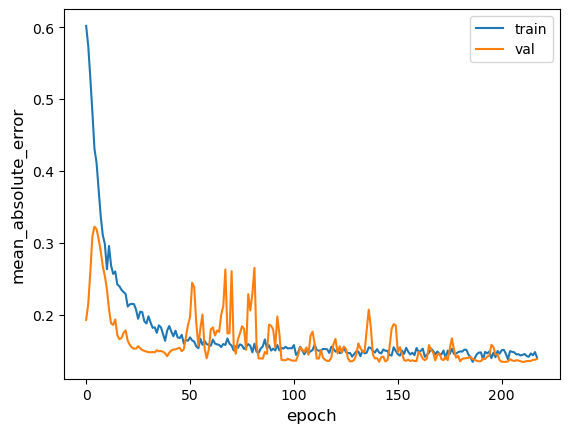

5/5 [==============================] - 0s 689us/step - loss: 0.0513 - mean_absolute_error: 0.1299
Test accuracy 0.12993012368679047
Test loss 0.05130065232515335


In [762]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [763]:
y_test_pred = multi_dense_model.predict(x_test)

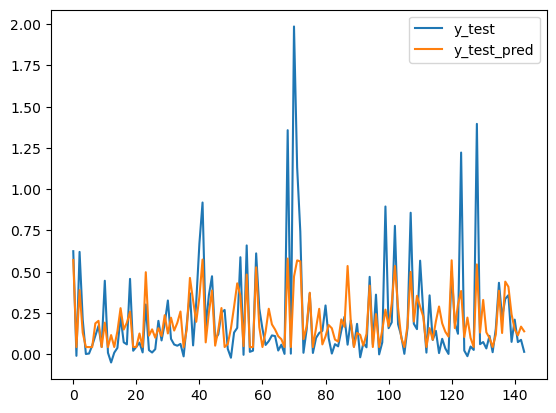

In [764]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [765]:
rmse(y_test.values, y_test_pred)

0.34515562704059993

In [767]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72701643],
       [0.72701643, 1.        ]])

In [768]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [769]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [770]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [771]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.6528 - mean_absolute_error: 0.6000 - val_loss: 0.5652 - val_mean_absolute_error: 0.6816
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4226 - mean_absolute_error: 0.4469 - val_loss: 0.1720 - val_mean_absolute_error: 0.2491
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2441 - mean_absolute_error: 0.3075 - val_loss: 0.5477 - val_mean_absolute_error: 0.6839
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1147 - mean_absolute_error: 0.2320 - val_loss: 0.7618 - val_mean_absolute_error: 0.8218
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1143 - mean_absolute_error: 0.2152 - val_loss: 0.6250 - val_mean_absolute_error: 0.7303
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1533 - mean_absolute_error: 0.2381 - val_loss: 0.5025 - val_mean_absolute_error: 0.6379
Epoch 7/500
25/25 [===

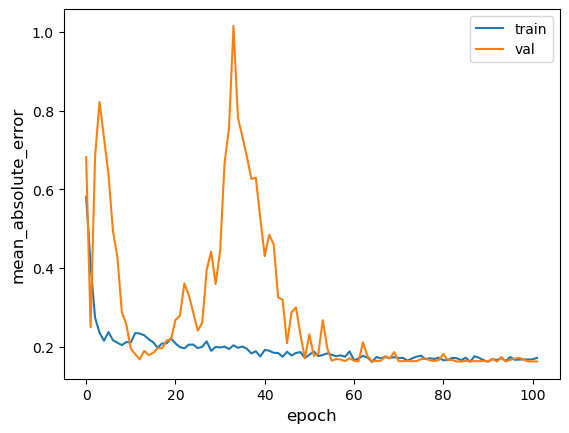

5/5 [==============================] - 0s 743us/step - loss: 0.0584 - mean_absolute_error: 0.1510
Test accuracy 0.1510043442249298
Test loss 0.058351628482341766


In [772]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [773]:
y_test_pred = multi_dense_model.predict(x_test)

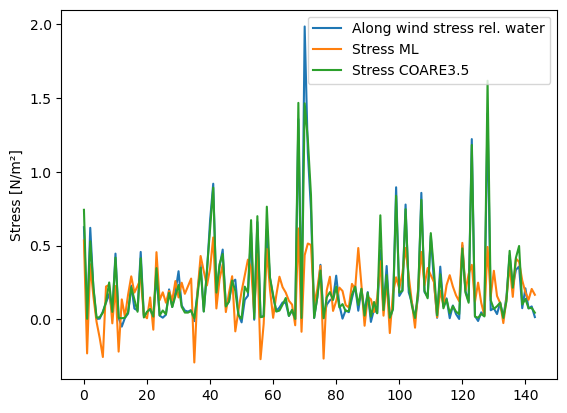

In [774]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [775]:
rmse(y_test.values, y_test_pred)

0.3578478735115795

In [776]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [777]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63910324],
       [0.63910324, 1.        ]])

In [778]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [779]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [780]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [781]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 3.2327 - mean_absolute_error: 1.2778 - val_loss: 7.5328 - val_mean_absolute_error: 2.5772
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9052 - mean_absolute_error: 0.9023 - val_loss: 2.0877 - val_mean_absolute_error: 1.3042
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0682 - mean_absolute_error: 0.6733 - val_loss: 0.9263 - val_mean_absolute_error: 0.8383
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9104 - mean_absolute_error: 0.6091 - val_loss: 0.4402 - val_mean_absolute_error: 0.5600
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1.1400 - mean_absolute_error: 0.6523 - val_loss: 0.3263 - val_mean_absolute_error: 0.4597
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9167 - mean_absolute_error: 0.6158 - val_loss: 0.1807 - val_mean_absolute_error: 0.2710
Epoch 7/500
25/25 [===

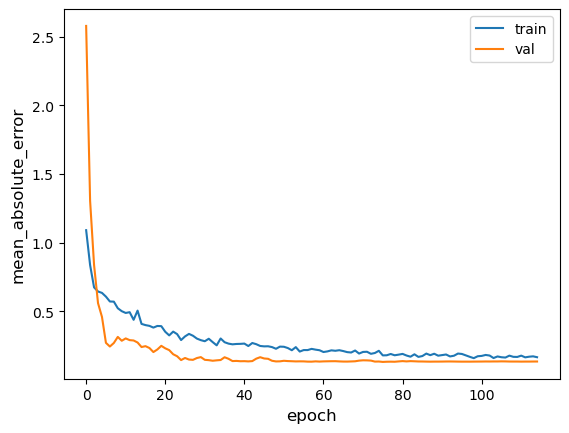

5/5 [==============================] - 0s 688us/step - loss: 0.0460 - mean_absolute_error: 0.1240
Test accuracy 0.12397655099630356
Test loss 0.04597241431474686


In [782]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [783]:
y_test_pred = multi_dense_model.predict(x_test)

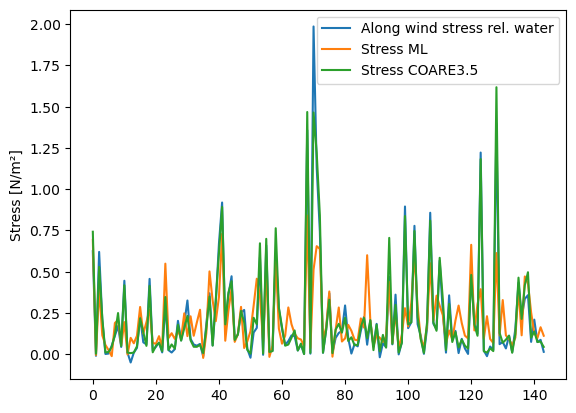

In [784]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [785]:
rmse(y_test.values, y_test_pred)

0.35761482845773135

In [786]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [787]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74351253],
       [0.74351253, 1.        ]])

In [788]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [789]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [790]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [791]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 1s 11ms/step - loss: 1.3411 - mean_absolute_error: 0.8283 - val_loss: 1.0479 - val_mean_absolute_error: 0.9838
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.8555 - mean_absolute_error: 0.6246 - val_loss: 1.3999 - val_mean_absolute_error: 1.1474
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6009 - mean_absolute_error: 0.5012 - val_loss: 1.6350 - val_mean_absolute_error: 1.2403
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6029 - mean_absolute_error: 0.4876 - val_loss: 1.5587 - val_mean_absolute_error: 1.2045
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5405 - mean_absolute_error: 0.4813 - val_loss: 1.4289 - val_mean_absolute_error: 1.1431
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3975 - mean_absolute_error: 0.4378 - val_loss: 1.2740 - val_mean_absolute_error: 1.0650
Epoch 7/500
13/13 [==

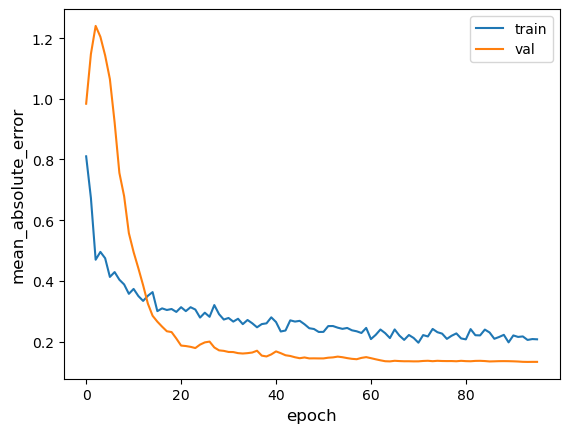

5/5 [==============================] - 0s 640us/step - loss: 0.0481 - mean_absolute_error: 0.1231
Test accuracy 0.12307856976985931
Test loss 0.0480603463947773


In [792]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [793]:
y_test_pred = multi_dense_model.predict(x_test)

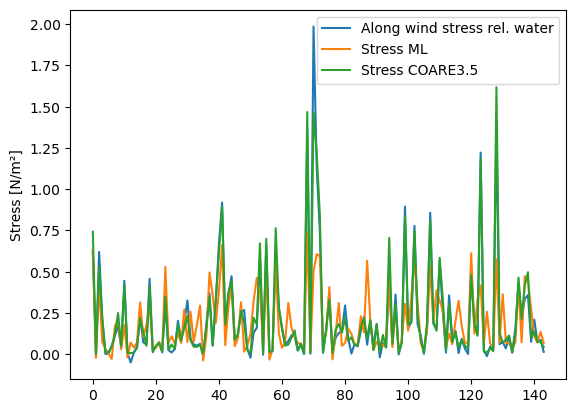

In [794]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [795]:
rmse(y_test.values, y_test_pred)

0.36058170293231906

In [796]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [797]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72510552],
       [0.72510552, 1.        ]])

In [798]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [809]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [810]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [811]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 110ms/step - loss: 0.9280 - mean_absolute_error: 0.6347 - val_loss: 1.1478 - val_mean_absolute_error: 0.9912
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 0.7684 - mean_absolute_error: 0.5838 - val_loss: 0.7564 - val_mean_absolute_error: 0.7993
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.7700 - mean_absolute_error: 0.5690 - val_loss: 0.5204 - val_mean_absolute_error: 0.6574
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6469 - mean_absolute_error: 0.5289 - val_loss: 0.4719 - val_mean_absolute_error: 0.6229
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 0.7782 - mean_absolute_error: 0.5915 - val_loss: 0.4561 - val_mean_absolute_error: 0.6112
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 0.5112 - mean_absolute_error: 0.5108 - val_loss: 0.4464 - val_mean_absolute_error: 0.6040
Epoch 7/500
2/2 [==========

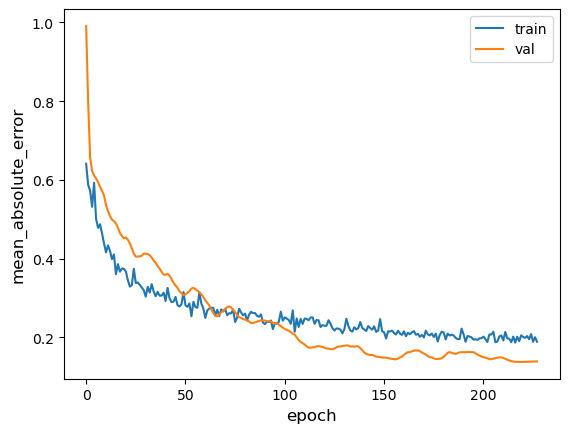

5/5 [==============================] - 0s 788us/step - loss: 0.0481 - mean_absolute_error: 0.1279
Test accuracy 0.12790551781654358
Test loss 0.0481320284307003


In [812]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [813]:
y_test_pred = multi_dense_model.predict(x_test)

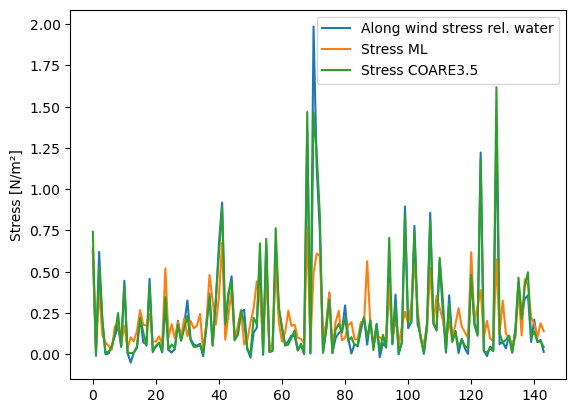

In [814]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [815]:
rmse(y_test.values, y_test_pred)

0.3490265917097901

In [816]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [817]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74384063],
       [0.74384063, 1.        ]])

In [818]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [829]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [830]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [831]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 126ms/step - loss: 1.1076 - mean_absolute_error: 0.7173 - val_loss: 0.1685 - val_mean_absolute_error: 0.2282
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 1.1882 - mean_absolute_error: 0.7341 - val_loss: 0.1782 - val_mean_absolute_error: 0.2533
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 0.9390 - mean_absolute_error: 0.6286 - val_loss: 0.2112 - val_mean_absolute_error: 0.3215
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.8193 - mean_absolute_error: 0.5750 - val_loss: 0.2320 - val_mean_absolute_error: 0.3575
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 0.8084 - mean_absolute_error: 0.5979 - val_loss: 0.2197 - val_mean_absolute_error: 0.3399
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 0.7487 - mean_absolute_error: 0.5901 - val_loss: 0.1947 - val_mean_absolute_error: 0.2983
Epoch 7/500
2/2 [==========

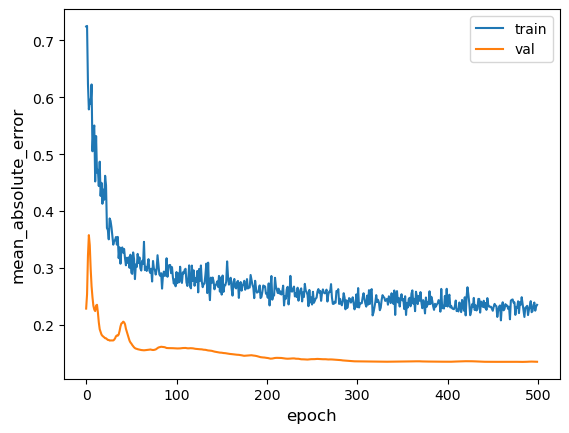

5/5 [==============================] - 0s 784us/step - loss: 0.0459 - mean_absolute_error: 0.1239
Test accuracy 0.12386870384216309
Test loss 0.04587024450302124


In [832]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [833]:
y_test_pred = multi_dense_model.predict(x_test)

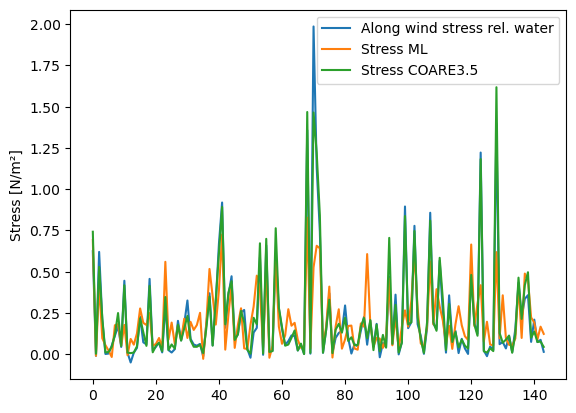

In [834]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [835]:
rmse(y_test.values, y_test_pred)

0.3613186571267141

In [836]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [837]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.7386796],
       [0.7386796, 1.       ]])

In [838]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]


# __________________________________________________

# s0_norm, inc, az

In [91]:
predictor_variables = ['s0_norm', 'inc', 'az']

In [92]:
x = df[predictor_variables]
x

s0_norm        inc          az
550 -13.810944  33.756705  281.998871
231  -8.873229  25.541340  436.039642
620  -8.518636  40.537636  440.176697
363  -8.964825  40.732867  280.222595
93   -9.432480  36.942763  280.304932
..         ...        ...         ...
664 -10.531108  40.721270  280.226105
293 -10.130495  32.144239  280.918274
235 -11.245704  40.547695  439.782623
596  -8.544512  40.545089  440.178009
607  -6.007861  40.532007  439.778198

[703 rows x 3 columns]

In [93]:
y = -  df['UWr'] * df['rhoair']
y

550    0.004852
231    0.128829
620    0.113729
363    0.116743
93     0.114107
         ...   
664    0.030718
293    0.186508
235    0.044480
596    0.299941
607    0.501150
Length: 703, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [94]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [95]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [96]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [97]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [98]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 6406.1035 - mean_absolute_error: 77.5724 - val_loss: 5577.2026 - val_mean_absolute_error: 72.0615
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 5481.8934 - mean_absolute_error: 71.5836 - val_loss: 4821.2554 - val_mean_absolute_error: 66.8802
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 4799.0758 - mean_absolute_error: 66.9338 - val_loss: 4131.9561 - val_mean_absolute_error: 61.7846
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 4012.8764 - mean_absolute_error: 61.0136 - val_loss: 3519.0547 - val_mean_absolute_error: 56.8783
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 3477.7536 - mean_absolute_error: 56.7075 - val_loss: 2980.1160 - val_mean_absolute_error: 52.1918
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 2924.8898 - mean_absolute_error: 51.7854 - val_loss: 2515.3169 - val_mea

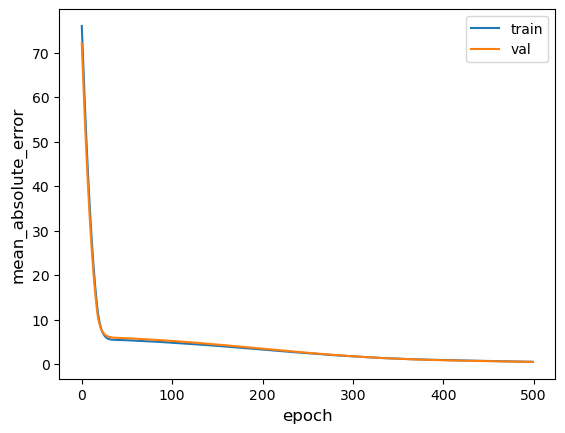

5/5 [==============================] - 0s 690us/step - loss: 0.5858 - mean_absolute_error: 0.5590
Test accuracy 0.5589612126350403
Test loss 0.5858104825019836


In [99]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [100]:
y_test_pred = multi_dense_model.predict(x_test)

In [101]:
np.mean(y_test)

0.24806902836947753

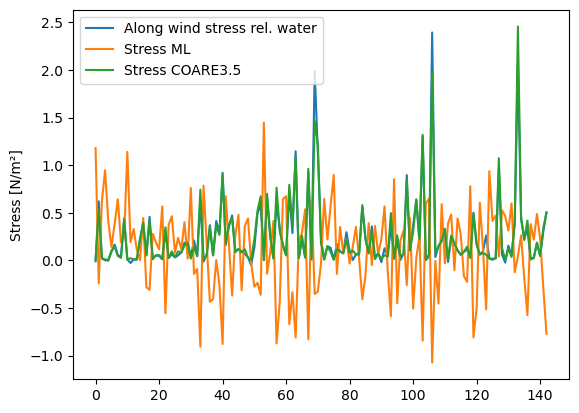

In [102]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [103]:
rmse(y_test.values, y_test_pred)

0.6192329661574552

In [104]:
rmse(y_test.values, c_test)

0.07877586678751598

In [105]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.56726801],
       [-0.56726801,  1.        ]])

In [106]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

# Other experiments

In [107]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [108]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [109]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 1.5473 - mean_absolute_error: 1.0303 - val_loss: 4.7367 - val_mean_absolute_error: 1.8713
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7392 - mean_absolute_error: 0.6826 - val_loss: 19.9682 - val_mean_absolute_error: 4.4018
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3489 - mean_absolute_error: 0.4799 - val_loss: 17.9360 - val_mean_absolute_error: 4.1839
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2515 - mean_absolute_error: 0.3976 - val_loss: 11.9931 - val_mean_absolute_error: 3.4099
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2094 - mean_absolute_error: 0.3393 - val_loss: 7.6354 - val_mean_absolute_error: 2.7101
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1507 - mean_absolute_error: 0.2849 - val_loss: 5.4930 - val_mean_absolute_error: 2.2895
Epoch 7/500
25/25 [

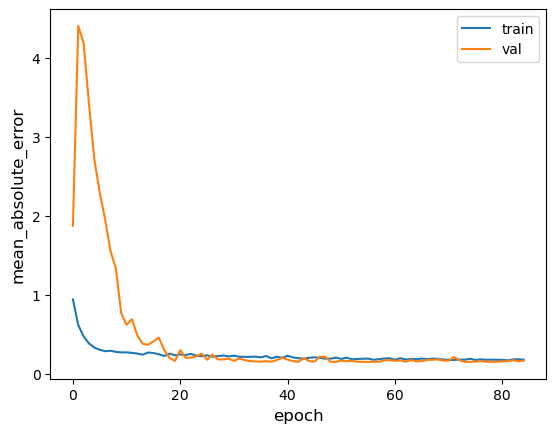

5/5 [==============================] - 0s 743us/step - loss: 0.0862 - mean_absolute_error: 0.1583
Test accuracy 0.1582760512828827
Test loss 0.08617700636386871


In [110]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [111]:
y_test_pred = multi_dense_model.predict(x_test)

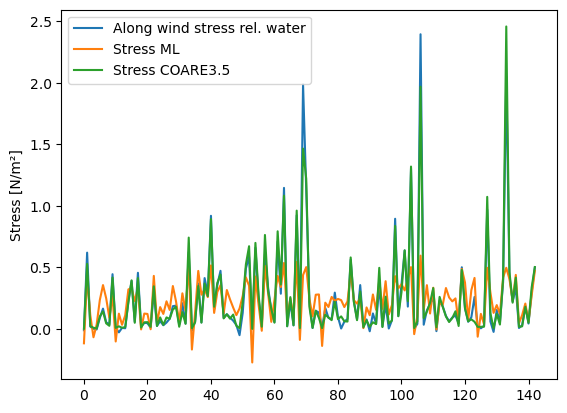

In [112]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [113]:
rmse(y_test.values, y_test_pred)

0.4143995377310141

In [114]:
rmse(y_test.values, c_test.values)

0.07877586678751598

In [115]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.68051562],
       [0.68051562, 1.        ]])

In [116]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

In [117]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [118]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [119]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 5.4637 - mean_absolute_error: 1.9108 - val_loss: 13.2212 - val_mean_absolute_error: 3.3679
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 2.0864 - mean_absolute_error: 1.0982 - val_loss: 3.9019 - val_mean_absolute_error: 1.7700
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.3883 - mean_absolute_error: 0.8296 - val_loss: 2.2874 - val_mean_absolute_error: 1.2734
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0709 - mean_absolute_error: 0.6930 - val_loss: 1.5632 - val_mean_absolute_error: 0.9522
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9545 - mean_absolute_error: 0.7301 - val_loss: 1.0705 - val_mean_absolute_error: 0.8185
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8295 - mean_absolute_error: 0.6493 - val_loss: 0.8835 - val_mean_absolute_error: 0.7288
Epoch 7/500
25/25 [==

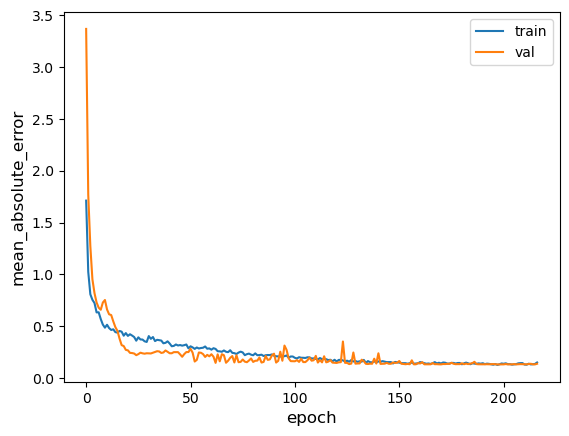

5/5 [==============================] - 0s 652us/step - loss: 0.0548 - mean_absolute_error: 0.1285
Test accuracy 0.12845827639102936
Test loss 0.05481324344873428


In [120]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [121]:
y_test_pred = multi_dense_model.predict(x_test)

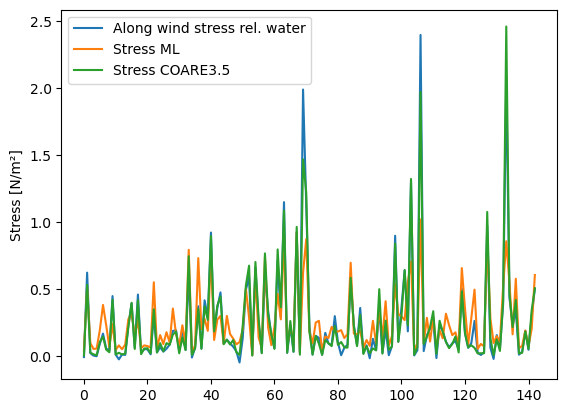

In [122]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [123]:
rmse(y_test.values, y_test_pred)

0.44166297133464927

In [124]:
rmse(y_test.values, c_test.values)

0.07877586678751598

In [125]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81719074],
       [0.81719074, 1.        ]])

In [126]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

In [127]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [128]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [129]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 124ms/step - loss: 1.4586 - mean_absolute_error: 0.9705 - val_loss: 320.6052 - val_mean_absolute_error: 17.4037
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 0.8004 - mean_absolute_error: 0.7145 - val_loss: 421.8497 - val_mean_absolute_error: 20.0322
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 0.6988 - mean_absolute_error: 0.6618 - val_loss: 353.1673 - val_mean_absolute_error: 18.3594
Epoch 4/500
2/2 [==============================] - 0s 24ms/step - loss: 0.5486 - mean_absolute_error: 0.5768 - val_loss: 281.0232 - val_mean_absolute_error: 16.3746
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4771 - mean_absolute_error: 0.5461 - val_loss: 267.5012 - val_mean_absolute_error: 15.9520
Epoch 6/500
2/2 [==============================] - 0s 24ms/step - loss: 0.4310 - mean_absolute_error: 0.5172 - val_loss: 259.5568 - val_mean_absolute_error: 15.6741
Epoch 7/5

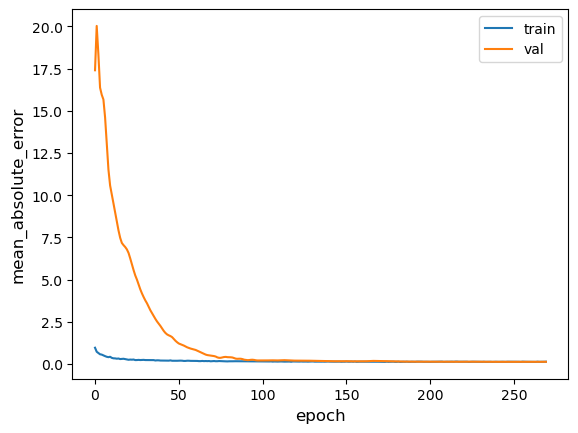

5/5 [==============================] - 0s 884us/step - loss: 0.0650 - mean_absolute_error: 0.1272
Test accuracy 0.12715639173984528
Test loss 0.06498388946056366


In [130]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [131]:
y_test_pred = multi_dense_model.predict(x_test)

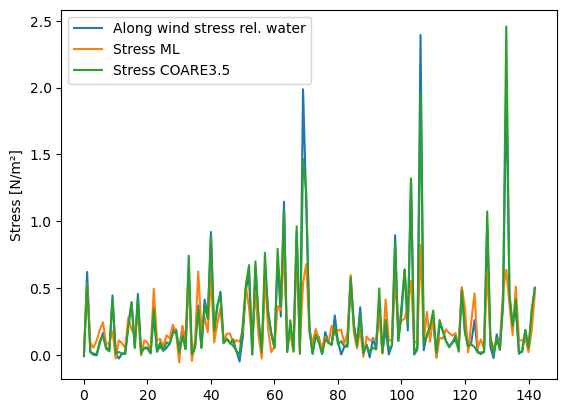

In [141]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [137]:
rmse(y_test.values, y_test_pred)

0.426412896679899

In [138]:
rmse(y_test.values, c_test.values)

0.07877586678751598

In [139]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80473376],
       [0.80473376, 1.        ]])

In [140]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97822569],
       [0.97822569, 1.        ]])

# __________________________________________________

# s0, s0_max, S0_min, inc, az

## s0 is the average

In [142]:
predictor_variables = ['s0', 's0_max', 's0_min', 'inc', 'az']

In [143]:
x = df[predictor_variables]
x

s0     s0_max     s0_min        inc          az
550 -22.179092 -14.403354 -33.655790  33.756705  281.998871
231  -5.928538  -2.696856  -9.671642  25.541340  436.039642
620 -16.856476 -13.292068 -21.013736  40.537636  440.176697
363 -17.900355 -10.593684 -31.048363  40.732867  280.222595
93  -15.894545  -9.493719 -26.184980  36.942763  280.304932
..         ...        ...        ...        ...         ...
664 -21.023922 -14.442977 -31.748220  40.721270  280.226105
293 -13.566919  -4.520779 -25.375633  32.144239  280.918274
235 -22.318418 -18.973738 -26.070083  40.547695  439.782623
596 -16.914012 -12.037181 -21.105565  40.545089  440.178009
607 -11.830559  -8.173307 -16.641775  40.532007  439.778198

[703 rows x 5 columns]

In [144]:
y = -  df['UWr'] * df['rhoair']
y

550    0.004852
231    0.128829
620    0.113729
363    0.116743
93     0.114107
         ...   
664    0.030718
293    0.186508
235    0.044480
596    0.299941
607    0.501150
Length: 703, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [145]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [146]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [147]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [148]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 96048.5368 - mean_absolute_error: 305.3387 - val_loss: 91566.7188 - val_mean_absolute_error: 298.1856
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 92190.3744 - mean_absolute_error: 299.1632 - val_loss: 88071.1328 - val_mean_absolute_error: 292.4256
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 90774.0497 - mean_absolute_error: 296.8190 - val_loss: 84663.0156 - val_mean_absolute_error: 286.6983
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 85009.4994 - mean_absolute_error: 287.2016 - val_loss: 81407.3359 - val_mean_absolute_error: 281.1177
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 83520.9319 - mean_absolute_error: 284.7129 - val_loss: 78201.7891 - val_mean_absolute_error: 275.5132
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 78766.6362 - mean_absolute_error: 276.4589 - val_los

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
np.mean(y_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# Other experiments

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# __________________________________________________

# s0, s0_max, s0_min, s0_std, inc, az

In [104]:
predictor_variables = ['s0', 's0_max', 's0_min', 's0_std', 'inc', 'az']

In [105]:
x = df[predictor_variables]
x

s0     s0_max     s0_min    s0_std        inc          az
220 -11.348112  -9.048957 -13.505619  1.625872  33.555539  437.892670
169 -16.357272 -14.982781 -17.512438  0.948284  40.522289  439.776215
467  -8.784147  -7.503172 -10.759739  1.166080  33.548429  437.894196
151 -15.764841 -11.969157 -22.702945  2.302839  40.723102  280.224854
695 -11.010427  -7.621449 -14.643066  1.741130  40.718319  280.225769
..         ...        ...        ...       ...        ...         ...
664 -17.007820 -14.248742 -19.819621  2.193463  40.527548  440.174164
293 -16.336338 -11.070109 -23.010149  2.422662  37.364239  439.766144
235 -14.515991 -13.440401 -16.211117  0.865476  33.545377  437.893524
596  -6.664412  -5.874245  -7.551517  0.589291  25.548476  436.039337
607  -7.547244  -6.678483  -9.142586  0.925636  25.547907  436.038910

[704 rows x 6 columns]

In [106]:
y = -  df['UWr'] * df['rhoair']
y

220    0.434718
169    0.270790
467    0.492172
151    0.332047
695    0.518476
         ...   
664    0.074651
293    0.209381
235    0.073328
596    0.086927
607    0.014381
Length: 704, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [107]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [108]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [109]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [110]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [111]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 38722.2224 - mean_absolute_error: 191.2789 - val_loss: 33863.2070 - val_mean_absolute_error: 177.9954
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 35074.4150 - mean_absolute_error: 181.6062 - val_loss: 31786.9023 - val_mean_absolute_error: 172.3075
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 34397.5120 - mean_absolute_error: 180.1604 - val_loss: 29791.7793 - val_mean_absolute_error: 166.6627
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 31960.4939 - mean_absolute_error: 173.4153 - val_loss: 27908.9043 - val_mean_absolute_error: 161.1557
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 29390.5080 - mean_absolute_error: 165.9891 - val_loss: 26114.6992 - val_mean_absolute_error: 155.7305
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 27150.0354 - mean_absolute_error: 159.4331 - val_los

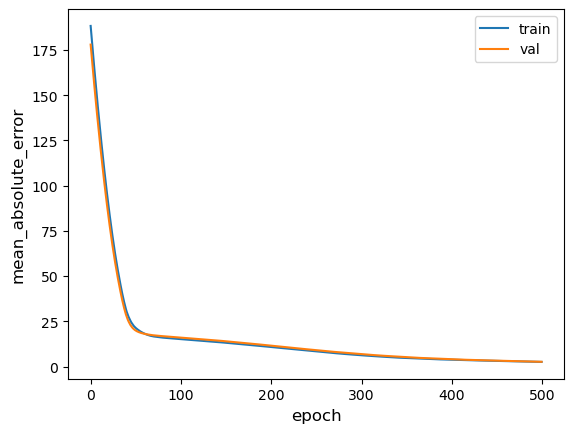

5/5 [==============================] - 0s 505us/step - loss: 11.1869 - mean_absolute_error: 2.6741
Test accuracy 2.67411208152771
Test loss 11.186882019042969


In [112]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [113]:
y_test_pred = multi_dense_model.predict(x_test)

In [114]:
np.mean(y_test)

0.21862490743242802

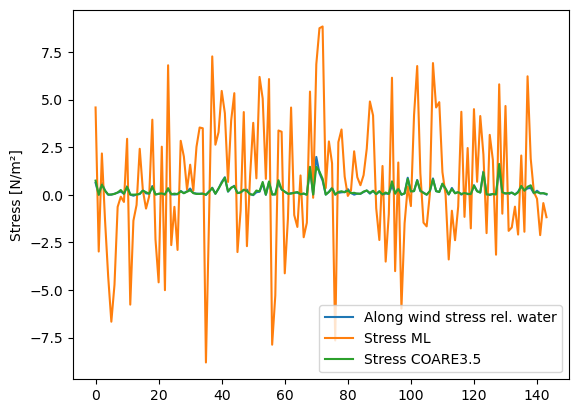

In [115]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [116]:
rmse(y_test.values, y_test_pred)

3.5182491745724738

In [117]:
rmse(y_test.values, c_test)

0.06549902869322344

In [118]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.55421621],
       [0.55421621, 1.        ]])

In [119]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

# Other experiments

In [120]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [121]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [122]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.3116 - mean_absolute_error: 0.4512 - val_loss: 1.0963 - val_mean_absolute_error: 0.8935
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1908 - mean_absolute_error: 0.3350 - val_loss: 0.1033 - val_mean_absolute_error: 0.2361
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1664 - mean_absolute_error: 0.2827 - val_loss: 0.1025 - val_mean_absolute_error: 0.2477
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1359 - mean_absolute_error: 0.2682 - val_loss: 0.0913 - val_mean_absolute_error: 0.1836
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1586 - mean_absolute_error: 0.2762 - val_loss: 0.1156 - val_mean_absolute_error: 0.2127
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1433 - mean_absolute_error: 0.2769 - val_loss: 0.0948 - val_mean_absolute_error: 0.1819
Epoch 7/500
25/25 [===

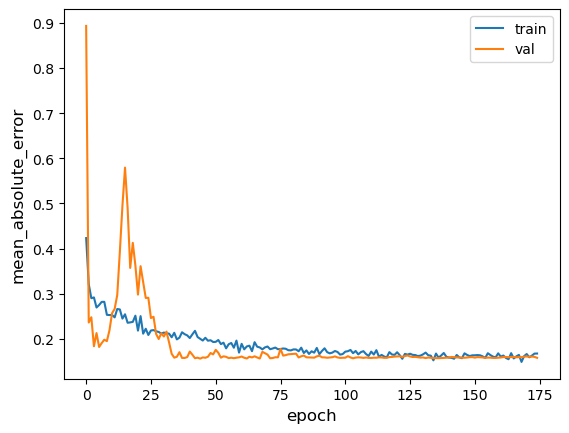

5/5 [==============================] - 0s 571us/step - loss: 0.0582 - mean_absolute_error: 0.1546
Test accuracy 0.1546223908662796
Test loss 0.05818043649196625


In [123]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [124]:
y_test_pred = multi_dense_model.predict(x_test)

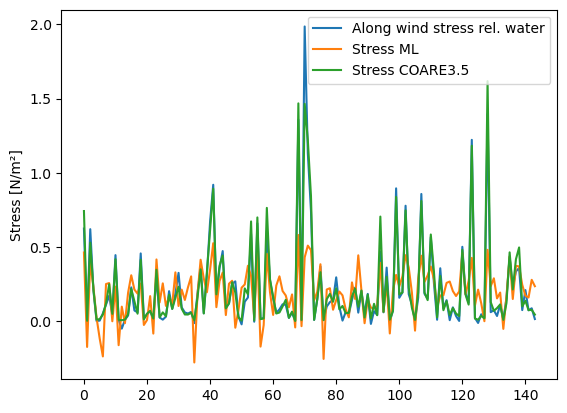

In [125]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [126]:
rmse(y_test.values, y_test_pred)

0.3526459077275419

In [127]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [128]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64301966],
       [0.64301966, 1.        ]])

In [129]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [130]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [131]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [132]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 4.6831 - mean_absolute_error: 1.8037 - val_loss: 60.9360 - val_mean_absolute_error: 7.6179
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9405 - mean_absolute_error: 1.0340 - val_loss: 8.5316 - val_mean_absolute_error: 2.7790
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.2494 - mean_absolute_error: 0.8237 - val_loss: 3.4194 - val_mean_absolute_error: 1.5900
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8705 - mean_absolute_error: 0.7036 - val_loss: 2.0333 - val_mean_absolute_error: 1.0507
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7270 - mean_absolute_error: 0.6182 - val_loss: 1.2817 - val_mean_absolute_error: 0.9507
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6089 - mean_absolute_error: 0.5756 - val_loss: 1.1127 - val_mean_absolute_error: 0.8896
Epoch 7/500
25/25 [==

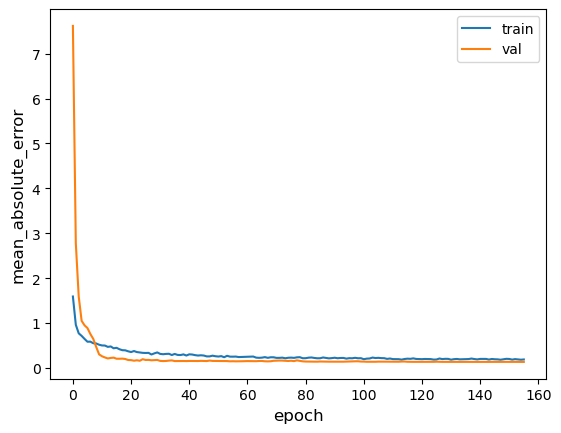

5/5 [==============================] - 0s 733us/step - loss: 0.0539 - mean_absolute_error: 0.1278
Test accuracy 0.1277768313884735
Test loss 0.053917255252599716


In [133]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [134]:
y_test_pred = multi_dense_model.predict(x_test)

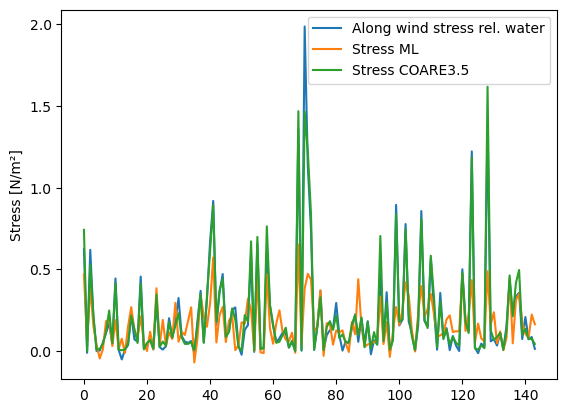

In [135]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [136]:
rmse(y_test.values, y_test_pred)

0.3452135506875237

In [137]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [138]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73677108],
       [0.73677108, 1.        ]])

In [139]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])

In [140]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [141]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [142]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 128ms/step - loss: 1.9644 - mean_absolute_error: 1.0810 - val_loss: 75.8463 - val_mean_absolute_error: 8.5580
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 1.0966 - mean_absolute_error: 0.8229 - val_loss: 175.3629 - val_mean_absolute_error: 12.9697
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 0.9106 - mean_absolute_error: 0.7255 - val_loss: 176.3249 - val_mean_absolute_error: 12.9505
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 0.6053 - mean_absolute_error: 0.6013 - val_loss: 142.9794 - val_mean_absolute_error: 11.6088
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.4843 - mean_absolute_error: 0.5459 - val_loss: 102.2018 - val_mean_absolute_error: 9.8037
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.3936 - mean_absolute_error: 0.4936 - val_loss: 76.7286 - val_mean_absolute_error: 8.4641
Epoch 7/500
2/

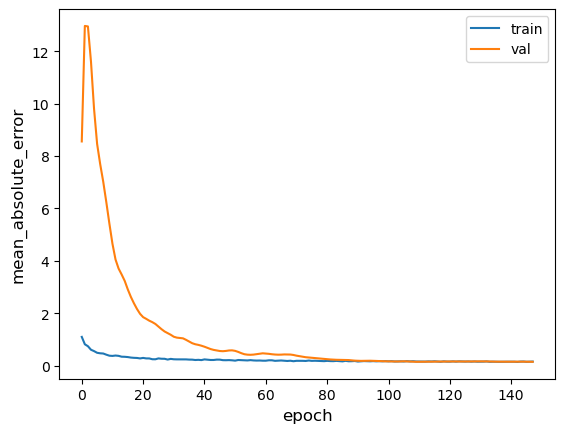

5/5 [==============================] - 0s 867us/step - loss: 0.0548 - mean_absolute_error: 0.1328
Test accuracy 0.13279186189174652
Test loss 0.05479494482278824


In [143]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [144]:
y_test_pred = multi_dense_model.predict(x_test)

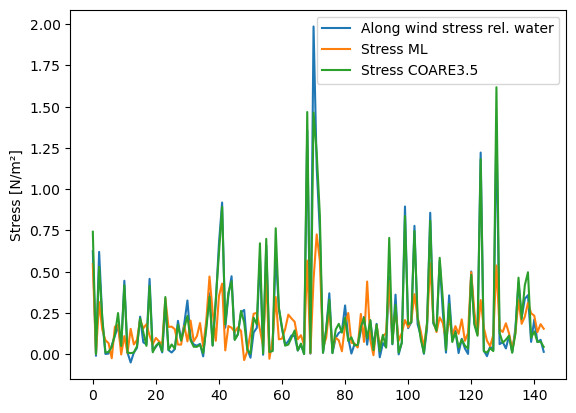

In [145]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [146]:
rmse(y_test.values, y_test_pred)

0.3424382696973598

In [147]:
rmse(y_test.values, c_test.values)

0.06549902869322344

In [148]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.73185964],
       [0.73185964, 1.        ]])

In [149]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97774818],
       [0.97774818, 1.        ]])